In [183]:
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import add_constant, OLS

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [184]:
df.sample(10)

,age,sex,bmi,children,smoker,region,charges
179,41,female,33.155,3,no,northeast,8538.28845
1334,18,female,31.920,0,no,northeast,2205.98080
949,25,male,29.700,3,yes,southwest,19933.45800
624,59,male,28.785,0,no,northwest,12129.61415
0,19,female,27.900,0,yes,southwest,16884.92400
974,26,male,35.420,0,no,southeast,2322.62180
545,49,male,25.840,2,yes,northwest,23807.24060
539,53,male,31.350,0,no,southeast,27346.04207
201,48,female,32.230,1,no,southeast,8871.15170
54,40,female,28.690,3,no,northwest,8059.67910


In [185]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [187]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [188]:
new_df = df.copy()
new_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<Axes: >

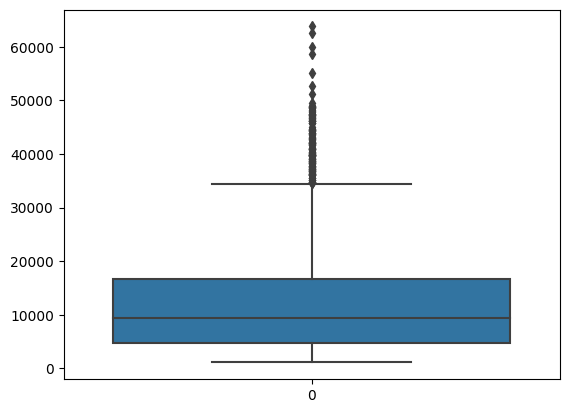

In [189]:

sns.boxplot(new_df['charges']) 

In [190]:
sa = sorted(new_df['charges'])
#print(sa)
q1, q3= np.percentile(sa,[25,75])
print("q1,q3:",q1,q3)
lower_bound = q1 -(1.5 * (q3-q1)) 
upper_bound = q3 + (1.5 * (q3-q1))
below = new_df['charges'] > lower_bound
above = new_df['charges'] < upper_bound
new_df = new_df[below & above]


q1,q3: 4740.28715 16639.912515


In [191]:
new_df.shape

(1199, 7)

C:\Users\admin\AppData\Local\Temp\ipykernel_2168\356114030.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['charges'])


<Axes: xlabel='charges', ylabel='Density'>

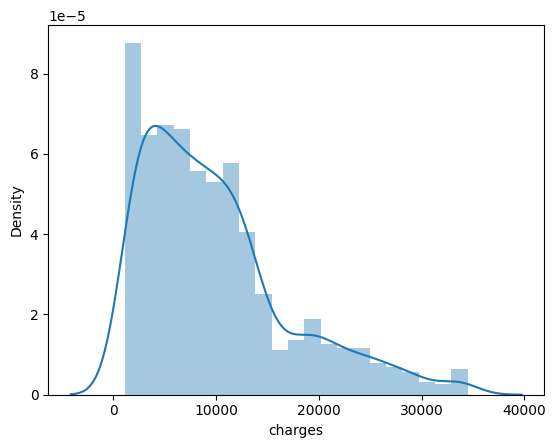

In [192]:
sns.distplot(new_df['charges'])

In [193]:
df.sample(10)

,age,sex,bmi,children,smoker,region,charges
551,32,female,28.930,0,no,southeast,3972.92470
125,26,female,28.785,0,no,northeast,3385.39915
175,63,female,37.700,0,yes,southwest,48824.45000
68,40,female,36.190,0,no,southeast,5920.10410
866,18,male,37.290,0,no,southeast,1141.44510
47,28,female,34.770,0,no,northwest,3556.92230
106,19,female,28.400,1,no,southwest,2331.51900
354,18,female,38.280,0,no,southeast,14133.03775
794,39,female,31.920,2,no,northwest,7209.49180
371,57,female,22.230,0,no,northeast,12029.28670


In [194]:
'''encoder=OneHotEncoder()
x1=encoder.fit_transform(df).toarray()
print(x1)'''

'encoder=OneHotEncoder()\nx1=encoder.fit_transform(df).toarray()\nprint(x1)'

In [195]:
new_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1199.0,38.989992,14.068040,18.0000,26.0000,39.00000,51.0000,64.000
bmi,1199.0,30.095200,6.010551,15.9600,25.8000,29.73500,33.8200,53.130
children,1199.0,1.084237,1.214304,0.0000,0.0000,1.00000,2.0000,5.000
charges,1199.0,9927.753402,7241.158309,1121.8739,4408.6959,8410.04685,12953.5946,34472.841


In [196]:
R= pd.get_dummies(new_df).copy() 
print(R.shape)
R.head()

(1199, 12)


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [197]:
x = R.drop(["charges"], axis = 1).copy()
y = R["charges"].copy()
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=7)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(959, 11)
(959,)
(240, 11)
(240,)


In [198]:
lr = LinearRegression()


In [199]:
model = lr.fit(x_train,y_train)
pre = model.predict(x_test)


In [200]:
score = model.score(x_test,y_test)
print('rsquare:',score)

rsquare: 0.6265003049078389


In [201]:
rsquare=1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print('adjusted rsquare:',rsquare)

adjusted rsquare: 0.6084805827761995


Text(0, 0.5, 'residuals')

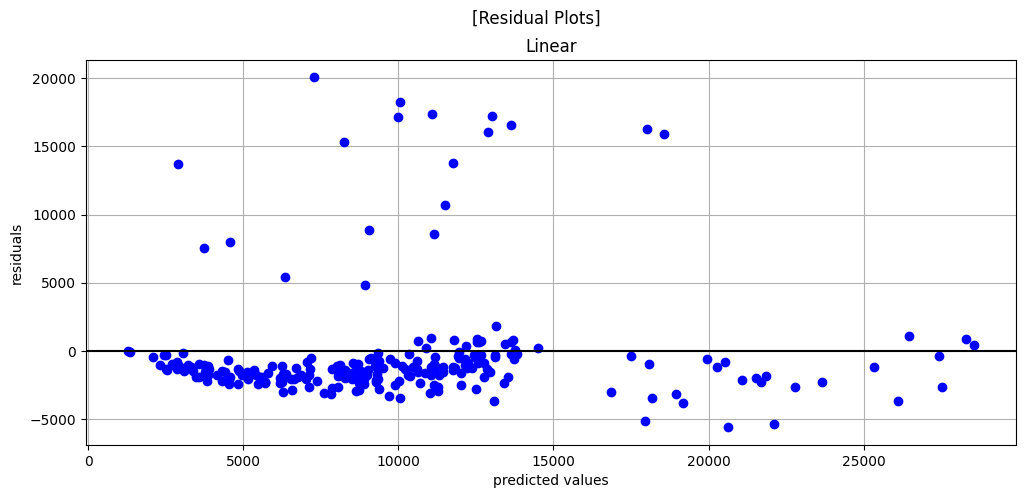

In [202]:
fig, axes = plt.subplots(1, 1, sharex=False, sharey=False)
fig.suptitle('[Residual Plots]')
fig.set_size_inches(12,5)
axes.plot(model.predict(x_test), y_test-model.predict(x_test), 'bo')
axes.axhline(y=0, color='k')
axes.grid()
axes.set_title('Linear')
axes.set_xlabel('predicted values')
axes.set_ylabel('residuals')

C:\Users\admin\AppData\Local\Temp\ipykernel_2168\2324923701.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals_linear)


Text(0.5, 1.0, 'Linear')

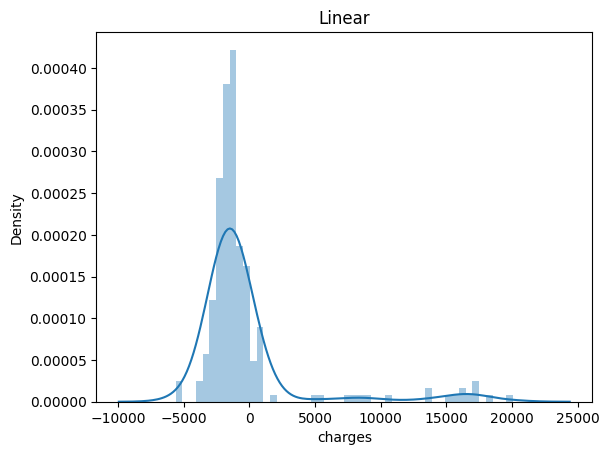

In [203]:
residuals_linear = y_test - model.predict(x_test)
sns.distplot(residuals_linear)
plt.title('Linear')

<Axes: title={'center': 'Model Coefficients'}>

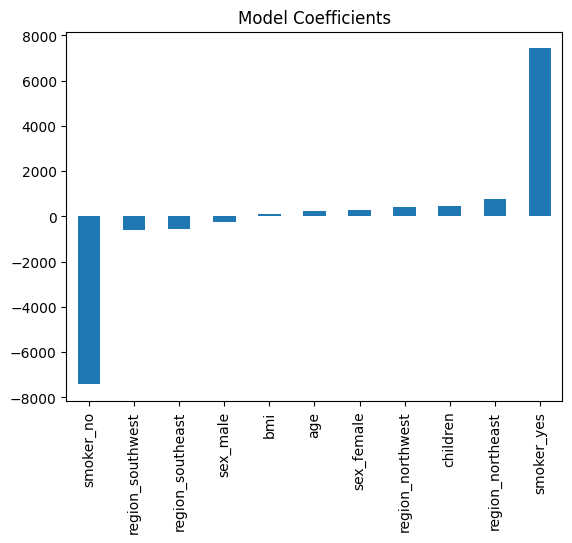

In [204]:
predictors = x_train.columns

coef = pd.Series(model.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Model Coefficients')

In [205]:
vif= pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns

C:\Users\admin\miniconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [206]:
vif["VIF"]

0     1.020381
1     1.167918
2     1.003027
3          inf
4          inf
5          inf
6          inf
7          inf
8          inf
9          inf
10         inf
Name: VIF, dtype: float64

In [207]:
x = add_constant(x)
tempMaxVIF = 5
maxVIF = 5
trainXCopy = x.copy()
counter = 1
highVIFColumnNames = []

while (tempMaxVIF >= maxVIF):
    tempVIFDf = pd.DataFrame()
    tempVIFDf['VIF'] = [variance_inflation_factor(trainXCopy.values, i) for i in range(trainXCopy.shape[1])]
    tempVIFDf['Column_Name'] = trainXCopy.columns
    tempVIFDf.dropna(inplace=True)
    tempColumnName = tempVIFDf.sort_values(["VIF"])[-1:]["Column_Name"].values[0]
    tempMaxVIF = tempVIFDf.sort_values(["VIF"])[-1:]["VIF"].values[0]
    if (tempMaxVIF >= maxVIF): 
        print(counter)
        print(tempColumnName)
        trainXCopy = trainXCopy.drop(tempColumnName, axis = 1)    
        highVIFColumnNames.append(tempColumnName) 
        counter = counter + 1


C:\Users\admin\miniconda3\lib\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\admin\miniconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\admin\miniconda3\lib\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\admin\miniconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\admin\miniconda3\lib\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\admin\miniconda3\lib\site-packages\statsmodels\stats\outliers_

1
region_southwest
2
smoker_yes
3
sex_male
4
const
5
bmi
6
age


In [208]:
print(highVIFColumnNames)

highVIFColumnNames.remove('const') 
print(highVIFColumnNames)
print(len(highVIFColumnNames))

x_new = x.drop(highVIFColumnNames, axis = 1)
print(x.shape)

['region_southwest', 'smoker_yes', 'sex_male', 'const', 'bmi', 'age']
['region_southwest', 'smoker_yes', 'sex_male', 'bmi', 'age']
5
(1199, 12)


In [209]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_new,y,test_size = 0.20,random_state=10) 
m1ModelDef = OLS(y_train2,x_train2) 
m1ModelBuild = m1ModelDef.fit() 
m1ModelBuild.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     107.2
Date:                Thu, 28 Sep 2023   Prob (F-statistic):          3.90e-103
Time:                        15:42:17   Log-Likelihood:                -9617.1
No. Observations:                 959   AIC:                         1.925e+04
Df Residuals:                     952   BIC:                         1.928e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2.098e+04    674.884     31.085      0.000    1.97e+04    2.23e+04
children           534.3608    147.358      3.626      0.000     245.177     823.545
sex_female         205.3767    356.166      0.577      0.564    -493.584     904.338
smoker_no        -1.394e+04    563.985    -24.720      0.000    -1.5e+04   -1.28e+04
region_northeast  1289.8509    511.599      2.521      0.012     285.859    2293.843
region_northwest   885.8797    506.157      1.750      0.080    -107.433    1879.193
region_southeast    93.0997    506.694      0.184      0.854    -901.267    1087.466
==============================================================================
Omnibus:                      235.116   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              502.871
Skew:                           1.364   Prob(JB):                    6.35e-110
Kurtosis:                       5.267   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [210]:
score3 =  m1ModelBuild.rsquared
score3

0.40312380401823755

In [213]:
ridgeReg = Ridge(alpha=0.00001, normalize=True)
x3 = fullRaw2.drop(["charges"], axis = 1).copy()
y3 = fullRaw2["charges"].copy()
x_train3,x_test3,y_train3,y_test3 = train_test_split(x3,y3,test_size = 0.20,random_state=150) 

ridgeReg.fit(x_train3,y_train3)
pred = ridgeReg.predict(x_test3)
score4 = ridgeReg.score(x_test3,y_test3)

score4




C:\Users\admin\miniconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


0.7200533742978537

In [214]:
ridgeReg.coef_

array([   261.12639322,    345.84704299,    466.77718192,     56.5180483 ,
          -56.51804791, -11813.78931103,  11813.78931104,    242.9301885 ,
          376.79542883,   -440.73838501,   -134.40563273])

<Axes: title={'center': 'Model Coefficients'}>

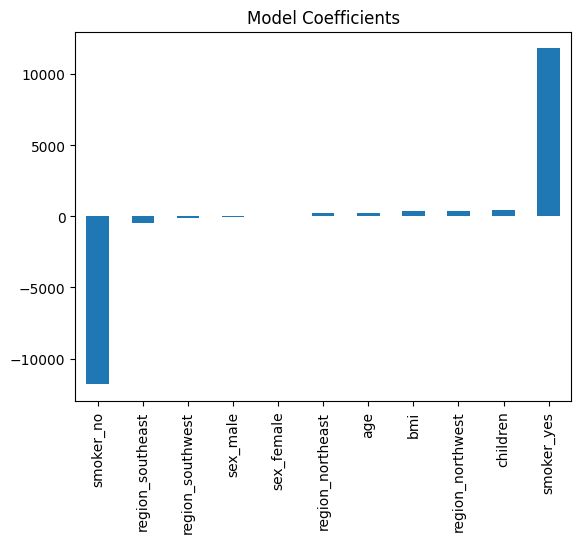

In [215]:
predictors = x_train.columns
coef = pd.Series(ridgeReg.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

In [216]:
lassoReg = Lasso(alpha=0.0001)
lassoReg.fit(x_train3,y_train3)
pred = lassoReg.predict(x_test3)
score5 = lassoReg.score(x_test3,y_test3)
score5

C:\Users\admin\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.313e+09, tolerance: 1.519e+07
  model = cd_fast.enet_coordinate_descent(


0.7200534586728216

In [218]:
print("all model score is:")
print("simple linear regression:          ",score)
print("After VIF simple linear regression:",score3)
print("ridge regression:                  ",score4)
print("lasso regression:                  ",score5)

all model score is:
simple linear regression:           0.6265003049078389
After VIF simple linear regression: 0.40312380401823755
ridge regression:                   0.7200533742978537
lasso regression:                   0.7200534586728216
